In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams["svg.fonttype"] = "none"
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, mannwhitneyu

In [4]:
semi_naive_deseq = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/deseq2_results_tables/semi_naive_vs_control_naive_deseq.tsv', sep="\t")

expressed_genes_set = set(semi_naive_deseq['gene_id'])
print("length of expressed_genes_set: ", len(expressed_genes_set))

transcript_data = []

with open('/ceph/hpc/home/novljanj/data_storage/genomes/genome_m39/gencode.vM27.chr_patch_hapl_scaff.annotation.gtf', 'r') as gtf_file:
    for line in gtf_file:
        if line.startswith('#'):
            continue

        columns = line.strip().split('\t')
        attributes = columns[8]

        if 'transcript_id' in attributes:
            gene_name = [field for field in attributes.split(';') if 'gene_name' in field][0]
            gene_name = gene_name.split('"')[1]
            gene_id = [field for field in attributes.split(';') if 'gene_id' in field][0]
            gene_id = gene_id.split('"')[1]
            transcript_id = [field for field in attributes.split(';') if 'transcript_id' in field][0]
            transcript_id = transcript_id.split('"')[1]
            gene_type = [field for field in attributes.split(';') if 'gene_type' in field][0]
            gene_type = gene_type.split('"')[1]

            transcript_data.append(columns[:7] + [gene_id] + [gene_name] + [transcript_id] + [gene_type])

column_names = ['seqname', 'source', 'feature', 'start', 'end', 'score', "strand", "gene_id", "gene_name", 'transcript_id', 'gene_type']

annotation = pd.DataFrame(transcript_data, columns=column_names)
annotation['start'] = annotation['start'].astype(int) - 1
annotation = annotation[annotation['feature'] == 'transcript']

gene_id_to_name = dict(zip(annotation['gene_id'], annotation['gene_name']))

expressed_gene_names_set = set([gene_id_to_name[gene_id] for gene_id in expressed_genes_set])
expressed_gene_names_set

length of expressed_genes_set:  16484


{'Plekhg1',
 'Epor',
 'Tle6',
 'Psph',
 'Tapbp',
 'Cdr2',
 'Lrrc27',
 'Fhl3',
 'Pole3',
 'Trpc4ap',
 'Spata5',
 'Prkcd',
 'Nrsn1',
 'Cenpv',
 'Gm43254',
 'Mdga1',
 'Siah2',
 'Usp49',
 'Tada2a',
 'Ppt1',
 'Nphp4',
 'Hacl1',
 'Sephs2',
 'Firre',
 'Cstb',
 'Gm14421',
 'Wdr90',
 'Fam13a',
 'Cds1',
 'Grpel1',
 'Uhrf1',
 'Gm5648',
 'Nudt17',
 'Sec14l2',
 'Ppdpf',
 'Sash3',
 'Zc3h10',
 'Slc23a2',
 'Gm49358',
 'RP23-458O22.5',
 'Gm48865',
 'Spo11',
 'Bcl2l1',
 'Cbx7',
 'Prdm9',
 'Tdh',
 'Deaf1',
 'Pdzd7',
 'Taf9b',
 'Pias1',
 'Pex19',
 'Rnft1',
 'Rwdd3',
 'B230354K17Rik',
 'Clpb',
 'Akap1',
 'Smarcd2',
 'Rsrc1',
 'Gm16096',
 'Ap1s3',
 'Smarca5',
 '1700040D17Rik',
 'Ptpn9',
 'Amacr',
 'Erp44',
 'Gtf3c5',
 'Fut8',
 'Ablim2',
 'Cacng8',
 'Top1',
 'Rps28',
 'Nefh',
 'Gm43462',
 'Zbtb43',
 'Gm47882',
 'Dnajc15',
 'Cfap300',
 'Rnf126',
 'Chrnb4',
 'Gm15651',
 'Trappc12',
 '1700037H04Rik',
 'Gtf3c1',
 'Gm13832',
 'Ube2j1',
 'Slc26a11',
 'Samd10',
 'Spg21',
 'Wsb2',
 'Topors',
 'Pkmyt1',
 'Ccdc162',
 

In [5]:
# read an excel file
TE = pd.read_excel('/ceph/hpc/home/novljanj/data_storage/projects/semi_oops_project/Data/Ingolia_riboseq/1-s2.0-S0092867411011925-mmc1.xls', sheet_name='Table S1C')
TE = TE[(TE['Gene'].isin(expressed_gene_names_set))]
TE

,UCSC ID,ribosome,mRNA,TE ratio,log2 TE,Gene,Description
5,uc008lvc.1,1.0,58.5,0.013832,-6.18,Pla2g4b,"phospholipase A2, group IVB"
8,uc009fwv.1,9.0,241.0,0.030218,-5.05,Map3k10,mitogen activated protein kinase kinase kinase
9,uc009gvf.1,53.0,1163.0,0.036876,-4.76,Ftl1,ferritin light chain 1
10,uc009flb.1,8.0,131.0,0.049416,-4.34,Gpr4,G protein-coupled receptor 4
12,uc008ujb.1,17.0,223.0,0.061687,-4.02,B4galt2,"UDP-Gal:betaGlcNAc beta 1,4-"
...,...,...,...,...,...,...,...
10215,uc007yue.1,860.5,87.0,8.003468,3.00,Lpp,LIM domain containing preferred translocation
10216,uc007kzn.1,2751.0,239.0,9.314066,3.22,Col1a1,"procollagen, type I, alpha 1"
10217,uc008lrq.1,7244.5,575.5,10.186141,3.35,Thbs1,thrombospondin 1
10218,uc009avm.1,1418.0,107.0,10.723562,3.42,Col1a2,"procollagen, type I, alpha 2"


In [20]:
masterfile = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/masterfile/all_smOOPS_and_controls_V2.tsv', sep='\t')
masterfile["all_smoops"] = masterfile["smoops_naive"] | masterfile["smoops_epi"] | masterfile["smoops_diff"]
masterfile["all_smoops"].value_counts()

all_smoops
True     1828
False    1232
Name: count, dtype: int64

In [21]:
clusters = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Results/machine_learning_results/cluster_assignment_file/cluster_of_all_model.tsv', sep='\t')
clusters

,transcript_id,Cluster
0,ENSMUST00000000199.8,0
1,ENSMUST00000000291.9,0
2,ENSMUST00000000312.12,0
3,ENSMUST00000000314.13,0
4,ENSMUST00000000642.11,0
...,...,...
1819,ENSMUST00000239449.2,0
1820,ENSMUST00000239483.2,0
1821,ENSMUST00000239525.1,0
1822,ENSMUST00000239527.1,0


In [18]:
merged["all_smoops"].value_counts()

all_smoops
False    7146
True      942
Name: count, dtype: int64

In [23]:
merged = pd.merge(TE, masterfile, right_on='gene_name', left_on='Gene', how='left')   
merged = pd.merge(merged, clusters, right_on='transcript_id', left_on='transcript_id', how='left')

merged["gene_id"] = merged["gene_id"].str.split('.').str[0]
merged['all_smoops'] = merged['all_smoops'].fillna(False)
merged["control_all"] = ~merged["all_smoops"].astype(bool)

merged["in_cluster_0_and_smoops_naive"] = (merged["Cluster"] == 0) & (merged["smoops_naive"])
merged["in_cluster_1_and_smoops_naive"] = (merged["Cluster"] == 1) & (merged["smoops_naive"])

/tmp/ipykernel_133342/869760690.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged['all_smoops'] = merged['all_smoops'].fillna(False)


control_all: 7146 data points, mean = 0.37
in_cluster_0_and_smoops_naive: 259 data points, mean = 0.47
control_all vs in_cluster_0_and_smoops_naive: p-value = 0.068
control_all: 7146 data points, mean = 0.37
in_cluster_1_and_smoops_naive: 24 data points, mean = 0.27
control_all vs in_cluster_1_and_smoops_naive: p-value = 0.654


/tmp/ipykernel_133342/1728990815.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=value_column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_133342/1728990815.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=value_column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)
/tmp/ipykernel_133342/1728990815.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(conditions)


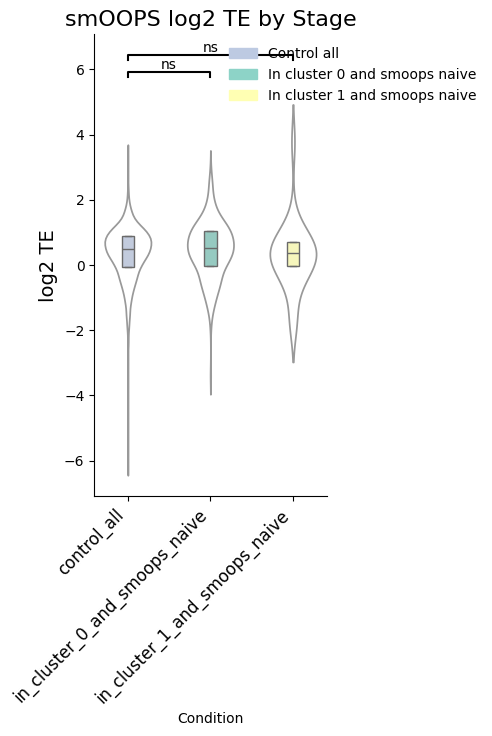

In [25]:
def plot_boxplot(df, value_column, control_column, compare_boolean_columns):

    conditions = [control_column] + compare_boolean_columns
    filtered_data = pd.DataFrame({
        condition: df[df[condition] == True][value_column] for condition in conditions
    })

    melted_data = filtered_data.melt(var_name='Condition', value_name=value_column)
    
    comparisons = [(control_column, condition) for condition in compare_boolean_columns]
    results = []
    for test_a, test_b in comparisons:
        test_a_data = filtered_data[test_a].dropna().to_list()
        test_b_data = filtered_data[test_b].dropna().to_list()
        print(f'{test_a}: {len(test_a_data)} data points, mean = {np.mean(test_a_data):.2f}')
        print(f'{test_b}: {len(test_b_data)} data points, mean = {np.mean(test_b_data):.2f}')
        stat, p_val = ttest_ind(test_a_data, test_b_data, equal_var=False)
        #stat, p_val = mannwhitneyu(test_a_data, test_b_data)
        results.append((test_a, test_b, p_val))
        print(f'{test_a} vs {test_b}: p-value = {p_val:.3f}')
        
    hex_palette = {control_column: '#bdcae2'}
    hex_palette.update({name: sns.color_palette('Set3')[idx] for idx, name in enumerate(compare_boolean_columns)})
    white_palette = {key: '#FFFFFF' for key in hex_palette.keys()}
    
    plt.figure(figsize=(len(compare_boolean_columns) * 0.5 + 2, 6))

    sns.violinplot(x='Condition', y=value_column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)

    ax = sns.boxplot(x='Condition', y=value_column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)    
    
    y_max = melted_data[value_column].max() + 2 
    y_step = y_max / 11 

    for idx, (test_a, test_b, p_val) in enumerate(results):
        x1, x2 = conditions.index(test_a), conditions.index(test_b)
        y, h = y_max + idx * y_step, y_step / 4
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c='black')
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        ax.text((x1 + x2) * 0.5, y + h, significance, ha='center', va='bottom', color='black')
    
    plt.title(f'smOOPS {value_column} by Stage', fontsize=16)
    plt.ylabel(f'{value_column}', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)

    ax.set_xticklabels(conditions)

    legend_elements = [mpatches.Patch(color=hex_palette[name], label=name.replace('_', ' ').capitalize()) for name in hex_palette]
    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.7, 1), frameon=False)

    sns.despine()
    plt.show()
    
plot_boxplot(merged, value_column='log2 TE', control_column = "control_all", compare_boolean_columns = ["in_cluster_0_and_smoops_naive", "in_cluster_1_and_smoops_naive"])